In [1]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
experiments_without = pickle.load(open("final_results/experiments_all_without_new_max4.p", "rb"))
outcomes_without = pickle.load(open("final_results/outcomes_all_without_new_max4.p", "rb"))
df_all_without = pd.merge(experiments_without,pd.DataFrame(outcomes_without), left_index=True, right_index=True)

In [3]:
df_all_without['no_sited'] = df_all_without.apply(lambda x: sum(x.optimal_facilities.values()), axis=1)

In [4]:
# df_all ['% assigned flow of max'] = (df_all['total_flow']*df_all['fraction_captured_total'])/(df_all['no_sited_nodes'])
def determine_no_c_and_m(x):
    if x.scenario_var==0:
        c=2000
        m=5
    elif x.scenario_var==1:
        c=3333
        m=3
    else:
        c=10000
        m=1
    return tuple([c, m])

In [5]:
df_all_without['c'] = df_all_without.apply(lambda x: determine_no_c_and_m(x)[0], axis=1)
df_all_without['m'] = df_all_without.apply(lambda x: determine_no_c_and_m(x)[1], axis=1)

In [6]:
df_all_without['r']=df_all_without['r']/1000

In [7]:
df_all_without.sort_values(['r','c','p'])

,r,scenario_var,p,scenario,policy,model,total_flow,fraction_captured_total,serviceable_fraction,served_fraction,optimal_facilities,non_zero_flows,add_nodes_used,no_sited,c,m
0,70.0,0,1,100,0,frlm,2.941841e+06,0.016316,0.103069,0.158305,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,1.0,2000,5
9,70.0,0,2,100,1,frlm,2.941841e+06,0.024861,0.103069,0.241206,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,2.0,2000,5
18,70.0,0,3,100,2,frlm,2.941841e+06,0.033445,0.103069,0.324495,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,3.0,2000,5
27,70.0,0,4,100,3,frlm,2.941841e+06,0.040362,0.103069,0.391603,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,4.0,2000,5
36,70.0,0,5,100,4,frlm,2.941841e+06,0.044898,0.103069,0.435611,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,5.0,2000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,150.0,2,96,108,95,frlm,2.941841e+06,0.716140,0.746216,0.959696,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,76.0,10000,1
872,150.0,2,97,108,96,frlm,2.941841e+06,0.716140,0.746216,0.959696,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,76.0,10000,1
881,150.0,2,98,108,97,frlm,2.941841e+06,0.716140,0.746216,0.959696,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,76.0,10000,1
890,150.0,2,99,108,98,frlm,2.941841e+06,0.716140,0.746216,0.959696,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,76.0,10000,1


## Reformatting
Now we want to establish a function, to find min number of stations to achieve max fraction captured total in all 9 scenarios

In [8]:
df_all_without_clean = pd.DataFrame()
for mn in [1, 3, 5]:
    for rn in [70, 110, 150]:
        df_rc = df_all_without.loc[(df_all_without.m==mn)&(df_all_without.r==rn)]
        # print(df_rc.served_fraction.max())
        df_rc = df_rc.loc[df_rc.fraction_captured_total<=df_rc.fraction_captured_total.max()*0.999]
        df_all_without_clean = pd.concat([df_all_without_clean, df_rc])

In [9]:
df_all_without = df_all_without_clean.copy()

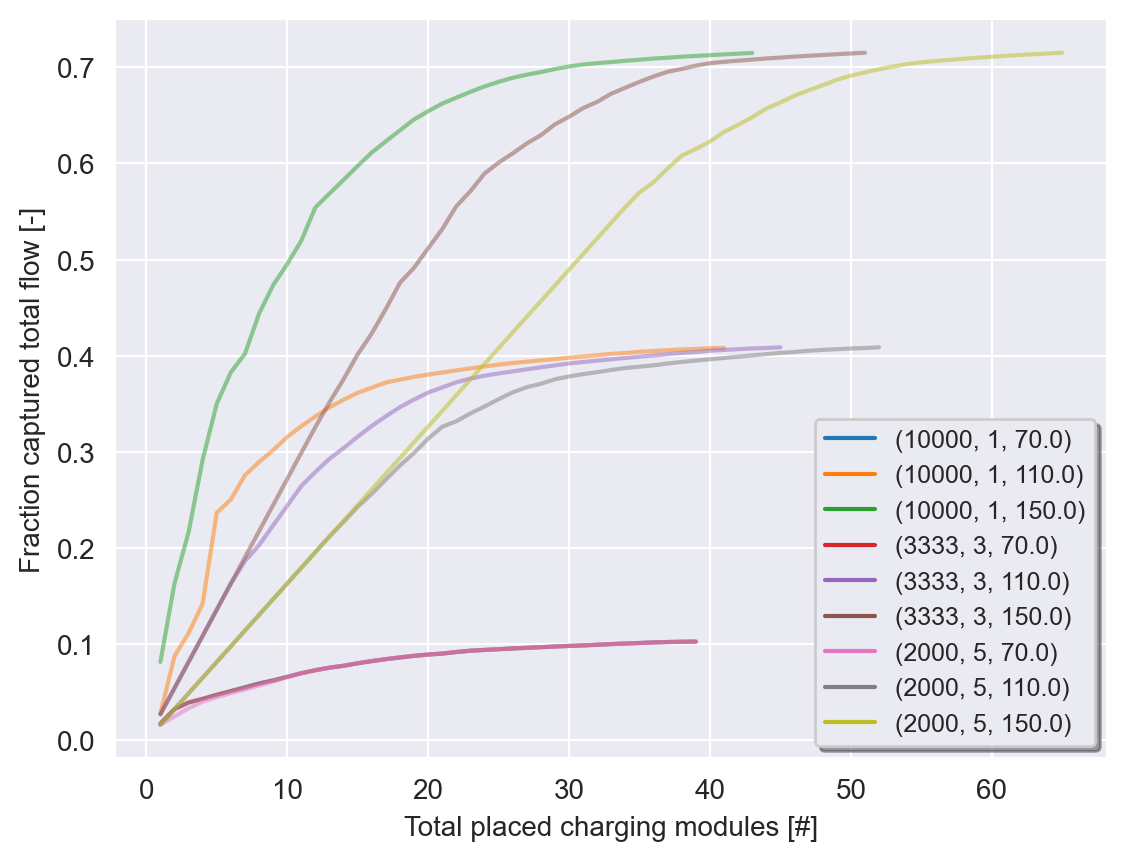

In [10]:
fig, ax = plt.subplots(dpi=200)
sns.lineplot(x='p', y='fraction_captured_total', hue=df_all_without[['c', 'm', 'r']].apply(tuple, axis=1), data=df_all_without, alpha=0.5)
ax.legend(fontsize=9, fancybox=True, shadow=True)
plt.xlabel('Total placed charging modules [#]')
plt.ylabel("Fraction captured total flow [-]")
plt.show()

# What are the outcomes with the most effective stations for each scenario?

In [11]:
df_without_best = pd.DataFrame()
for r in [70, 110, 150]:
    for m,c in [(1, 10000), (3, 3333), (5,2000)]:
        relevant_rows = df_all_without.loc[(df_all_without.c==c)&(df_all_without.m==m)&(df_all_without.r==r)]
        relevant_rows = relevant_rows.loc[relevant_rows.p==relevant_rows.p.max()]
        df_without_best = pd.concat([df_without_best, relevant_rows], ignore_index=True)

In [12]:
df_without_best

,r,scenario_var,p,scenario,policy,model,total_flow,fraction_captured_total,serviceable_fraction,served_fraction,optimal_facilities,non_zero_flows,add_nodes_used,no_sited,c,m
0,70.0,2,39,102,38,frlm,2.941841e+06,0.102755,0.103069,0.996949,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,39.0,10000,1
1,70.0,1,39,101,38,frlm,2.941841e+06,0.102755,0.103069,0.996949,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,39.0,3333,3
2,70.0,0,39,100,38,frlm,2.941841e+06,0.102755,0.103069,0.996949,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,39.0,2000,5
3,110.0,2,41,105,40,frlm,2.941841e+06,0.408230,0.409292,0.997405,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,41.0,10000,1
4,110.0,1,45,104,44,frlm,2.941841e+06,0.408810,0.409292,0.998821,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,45.0,3333,3
5,110.0,0,52,103,51,frlm,2.941841e+06,0.408810,0.409292,0.998821,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,52.0,2000,5
6,150.0,2,43,108,42,frlm,2.941841e+06,0.714954,0.746216,0.958107,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,43.0,10000,1
7,150.0,1,51,107,50,frlm,2.941841e+06,0.715155,0.746216,0.958376,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,51.0,3333,3
8,150.0,0,65,106,64,frlm,2.941841e+06,0.715180,0.746216,0.958409,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,65.0,2000,5


In [13]:
df_without_best_copy=df_without_best.copy()
df_without_best_copy.c = df_without_best_copy.c.apply(lambda x: "5x2 MW" if x==2000 else x)
df_without_best_copy.c = df_without_best_copy.c.apply(lambda x: "3x3.3 MW" if x==3333 else x)
df_without_best_copy.c = df_without_best_copy.c.apply(lambda x: "1x10 MW" if x==10000 else x)

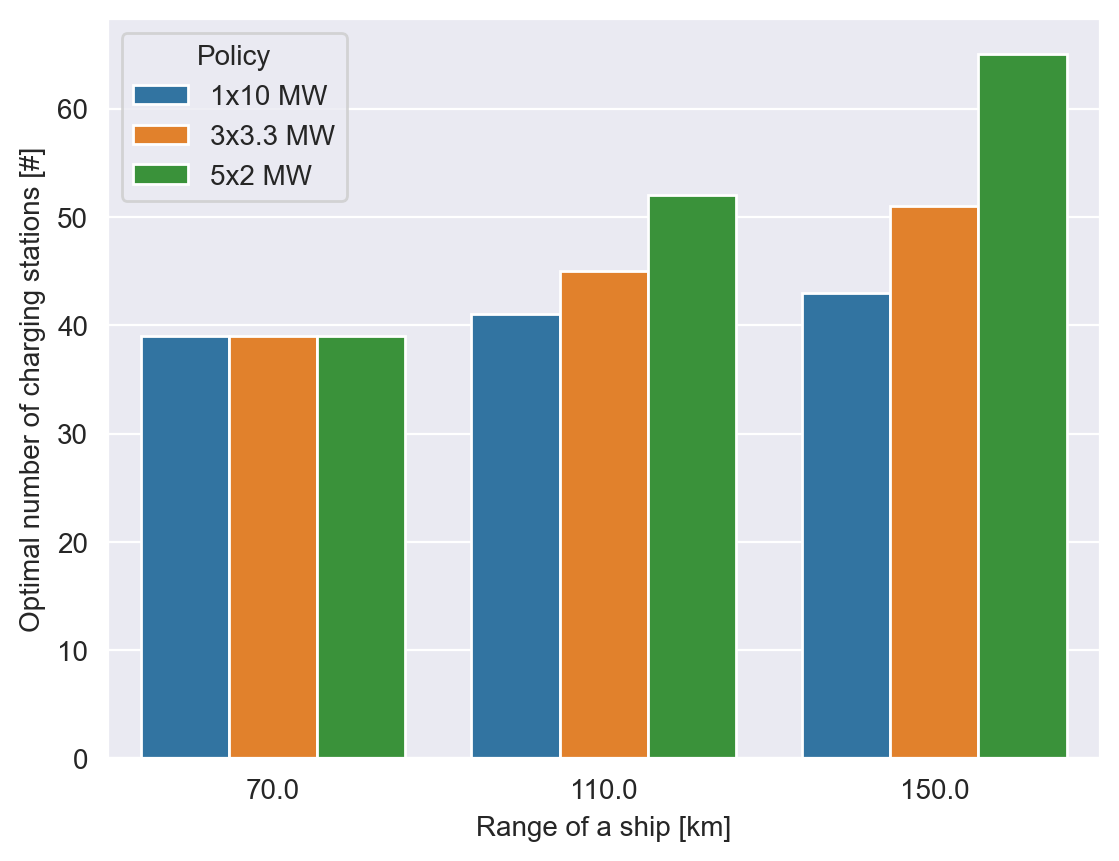

In [30]:
fig, ax = plt.subplots(dpi=200)
sns.barplot(x='r', y='p', data=df_without_best_copy, hue='c')
plt.xlabel('Range of a ship [km]')
plt.ylabel('Optimal number of charging stations [#]')
ax.legend(title="Policy")

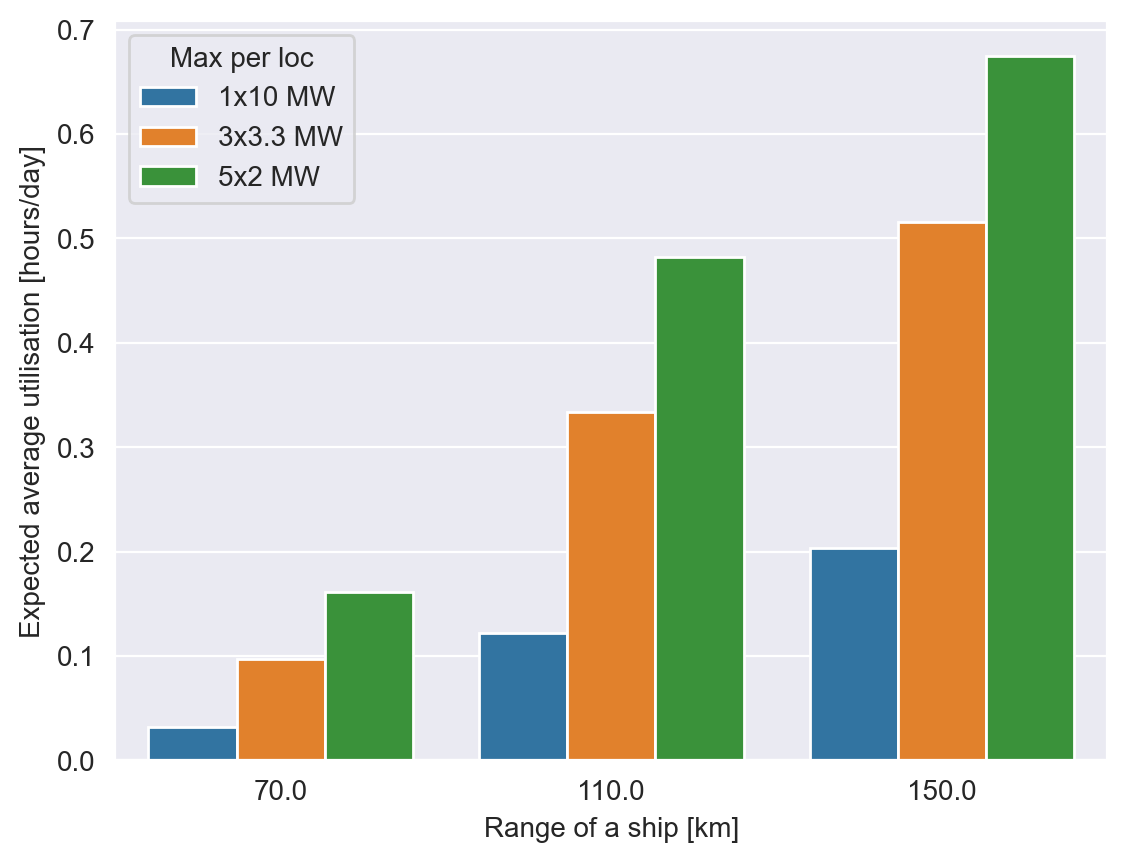

In [29]:
fig, ax = plt.subplots(dpi=200)
sns.barplot(x='r', y=((2941841.1*df_without_best_copy['fraction_captured_total'])/(df_without_best_copy['p']*df_without_best['c']))/24, data=df_without_best_copy, hue='c')
plt.xlabel('Range of a ship [km]')
plt.ylabel('Expected average utilisation [-]')
plt.legend(title='Policy')

In [16]:
pickle.dump(df_without_best, open('final_results/df_all_without_clean.p', 'wb'))

## With additional nodes

In [17]:
experiments_with = pickle.load(open("ema_workbench/results/experiments_all_with_new_max4.p", "rb"))
outcomes_with = pickle.load(open("ema_workbench/results/outcomes_all_with_new_max4.p", "rb"))
df_all_with = pd.merge(experiments_with,pd.DataFrame(outcomes_with), left_index=True, right_index=True)
df_all_with['c'] = df_all_with.apply(lambda x: determine_no_c_and_m(x)[0], axis=1)
df_all_with['m'] = df_all_with.apply(lambda x: determine_no_c_and_m(x)[1], axis=1)

## Reformatting

In [18]:
df_all_with['no_sited'] = df_all_with.apply(lambda x: sum(x.optimal_facilities.values()), axis=1)
df_all_with['r']=df_all_with['r']/1000

In [19]:
df_all_with_clean = pd.DataFrame()
for mn in [1, 3, 5]:
    for rn in [70, 110, 150]:
        df_rc = df_all_with.loc[(df_all_with.m == mn) & (df_all_with.r == rn)]
        # print(df_rc.served_fraction.max())
        df_rc = df_rc.loc[df_rc.fraction_captured_total <= df_rc.fraction_captured_total.max() * 0.999]
        df_all_with_clean = pd.concat([df_all_with_clean, df_rc])
df_all_with = df_all_with_clean.copy()

## Results with additional nodes

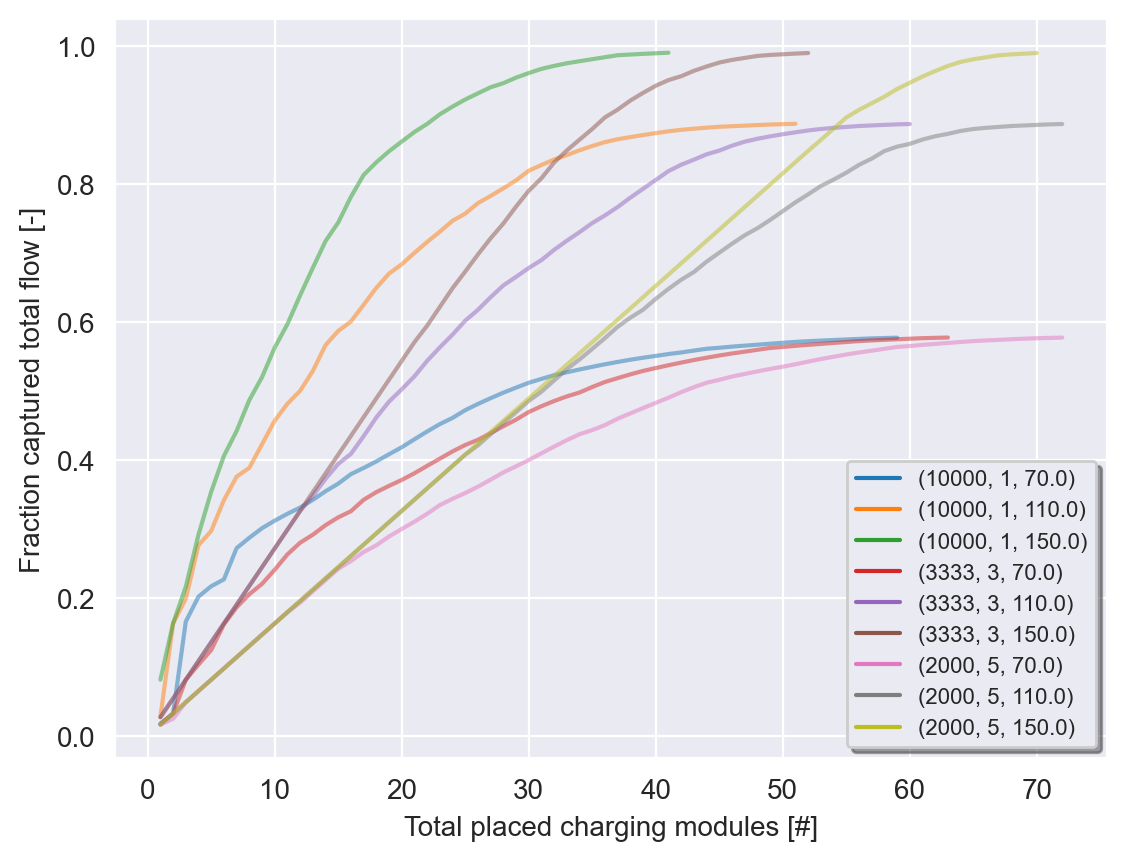

In [20]:
fig, ax = plt.subplots(dpi=200)
sns.lineplot(x='p', y='fraction_captured_total', hue=df_all_with[['c', 'm', 'r']].apply(tuple, axis=1), data=df_all_with.loc[df_all_with.served_fraction<1], alpha=0.5)
ax.legend(fontsize=8, fancybox=True, shadow=True)
plt.xlabel('Total placed charging modules [#]')
plt.ylabel("Fraction captured total flow [-]")
plt.show()

In [21]:
import numpy as np

In [22]:
df_all_with.served_fraction.round(4)

2      0.0303
11     0.0562
20     0.2867
29     0.3493
38     0.3753
        ...  
591    0.9922
600    0.9951
609    0.9965
618    0.9975
627    0.9985
Name: served_fraction, Length: 540, dtype: float64

In [23]:
df_with_best = pd.DataFrame()
for r in [70, 110, 150]:
    for m, c in [(1, 10000), (3, 3333), (5, 2000)]:
        relevant_rows = df_all_with.loc[(df_all_with.c == c) & (df_all_with.m == m) & (df_all_with.r == r)]
        relevant_rows = relevant_rows.loc[relevant_rows.p == relevant_rows.p.max()]
        df_with_best = pd.concat([df_with_best, relevant_rows], ignore_index=True)

In [24]:
df_with_best

,r,scenario_var,p,scenario,policy,model,total_flow,fraction_captured_total,serviceable_fraction,served_fraction,optimal_facilities,non_zero_flows,add_nodes_used,c,m,no_sited
0,70.0,2,59,102,58,frlm,2.941841e+06,0.577515,0.578467,0.998355,"{'101': 0.0, '102': 0.0, '103': 0.0, '104': 1....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",27.0,10000,1,59.0
1,70.0,1,63,101,62,frlm,2.941841e+06,0.577688,0.578467,0.998654,"{'101': 0.0, '102': 0.0, '103': 0.0, '104': 1....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",29.0,3333,3,63.0
2,70.0,0,72,100,71,frlm,2.941841e+06,0.577607,0.578467,0.998514,"{'101': 0.0, '102': 0.0, '103': 0.0, '104': 1....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",27.0,2000,5,72.0
3,110.0,2,51,105,50,frlm,2.941841e+06,0.887577,0.888502,0.998958,"{'101': 0.0, '102': 0.0, '103': 1.0, '104': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",23.0,10000,1,51.0
4,110.0,1,60,104,59,frlm,2.941841e+06,0.887282,0.888502,0.998627,"{'101': 0.0, '102': 0.0, '103': 0.0, '104': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",23.0,3333,3,60.0
5,110.0,0,72,103,71,frlm,2.941841e+06,0.887269,0.888502,0.998612,"{'101': 0.0, '102': 1.0, '103': 0.0, '104': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",25.0,2000,5,72.0
6,150.0,2,41,108,40,frlm,2.941841e+06,0.990664,0.991757,0.998898,"{'101': 0.0, '102': 0.0, '103': 0.0, '104': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",21.0,10000,1,41.0
7,150.0,1,52,107,51,frlm,2.941841e+06,0.990233,0.991757,0.998463,"{'101': 0.0, '102': 0.0, '103': 0.0, '104': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",22.0,3333,3,52.0
8,150.0,0,70,106,69,frlm,2.941841e+06,0.990233,0.991757,0.998463,"{'101': 0.0, '102': 0.0, '103': 0.0, '104': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",24.0,2000,5,70.0


In [25]:
pickle.dump(df_with_best, open('data/data_9_scenarios.p', 'wb'))

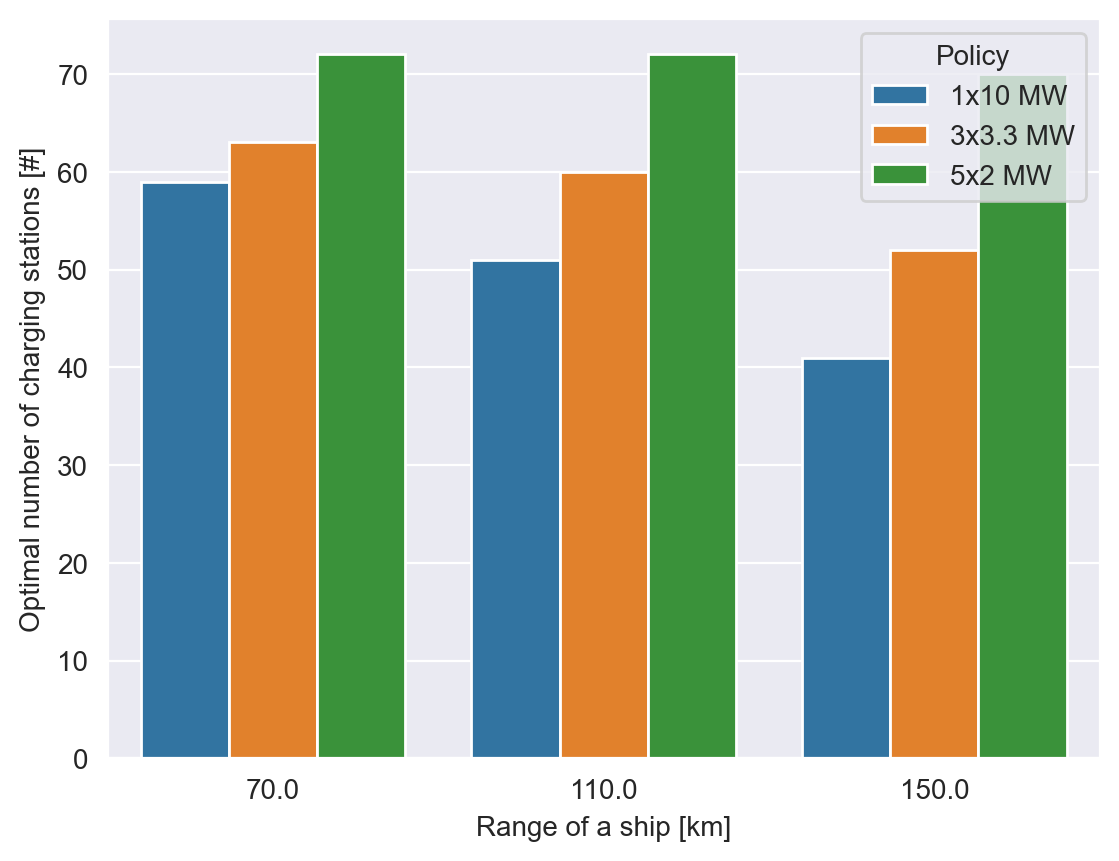

In [31]:
df_with_best_copy = df_with_best.copy()
df_with_best_copy.c = df_with_best_copy.c.apply(lambda x: "5x2 MW" if x == 2000 else x)
df_with_best_copy.c = df_with_best_copy.c.apply(lambda x: "3x3.3 MW" if x == 3333 else x)
df_with_best_copy.c = df_with_best_copy.c.apply(lambda x: "1x10 MW" if x == 10000 else x)

fig, ax = plt.subplots(dpi=200)
sns.barplot(x='r', y='p', data=df_with_best_copy, hue='c')
plt.xlabel('Range of a ship [km]')
plt.ylabel('Optimal number of charging stations [#]')
ax.legend(title="Policy")

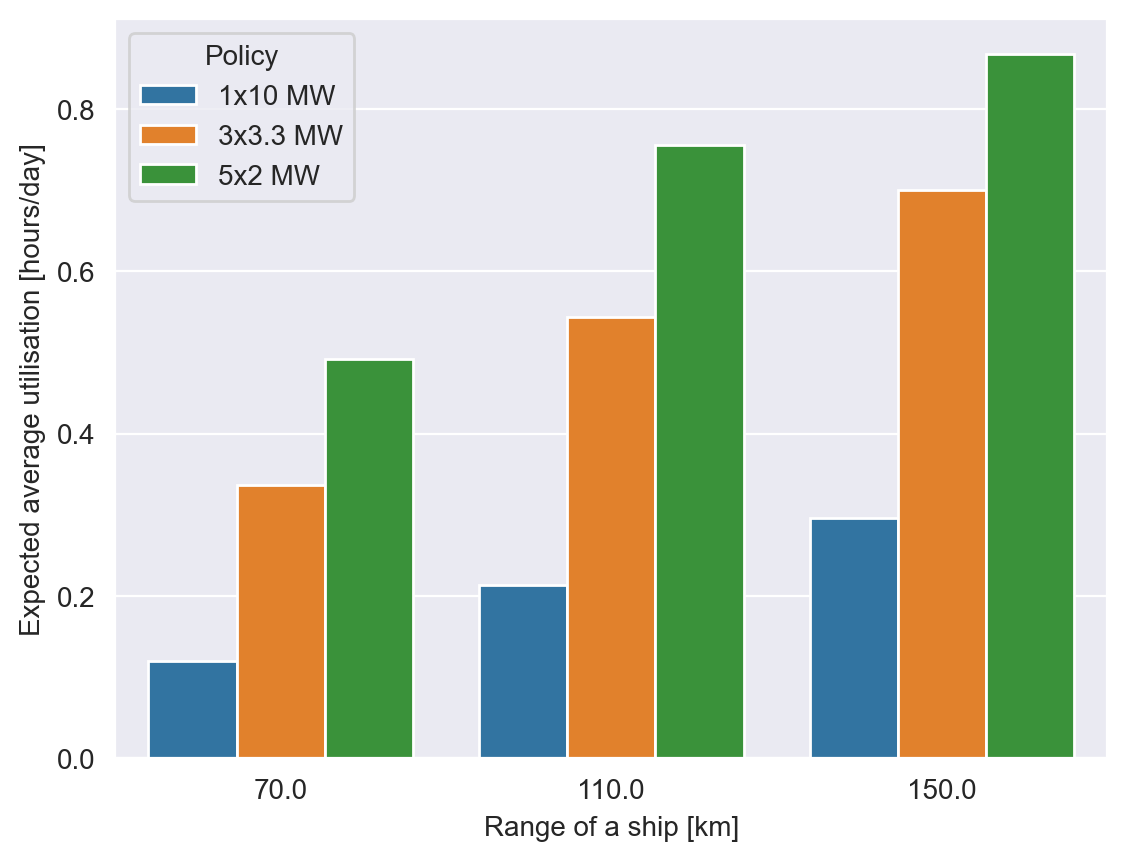

In [34]:
fig, ax = plt.subplots(dpi=200)
sns.barplot(x='r', y=((2941841.1*df_with_best_copy['fraction_captured_total'])/(df_with_best_copy['p']*df_with_best['c']))/24, data=df_with_best_copy, hue='c')
plt.xlabel('Range of a ship [km]')
plt.ylabel('Expected average utilisation [hours/day]')
plt.legend(title='Policy')

In [28]:
pickle.dump(df_with_best, open('final_results/df_all_with_clean.p', 'wb'))